# Tutorial for using CRDipy

`crdipy` is a Python code that allows a user to: 

- Starting with a Healpy map of a cosmic ray signal observed by a perfect detector with uniform exposure in 4pi, generate a set of events as would be seen by the Pierre Auger Observatory, accounting for zenith cut and zenith selection criteria of the detector (function `generate_events`).

- Using the generated event set, evaluate the large scale dipole anistropy of the dataset (function `get_dipole`).

The detector constraints and Rayleigh analysis in this code follows the analysis outlined in Aab, A., et al. 2017, Science, 357, 1266,481 doi: 10.1126/science.aan4338482. 

An example of similar code is provided by Auger Open Data (https://www.kaggle.com/code/augeropendata/large-scale-anisotropy/notebook) 

In [1]:
import numpy as np
import healpy as hp
import pylab as pl

Here we generate a sample Healpy skymap with some intermediate-scale structure. The Healpy map represents the cosmic ray events that would be observed by a perfect detector with uniform exposure in 4pi.

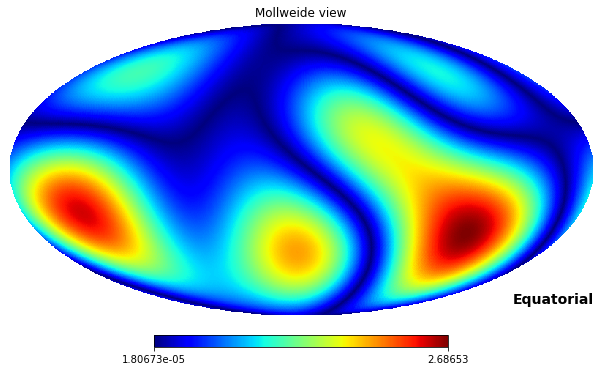

In [2]:
l = [1, 1, 1, 1]
inputMap = abs(hp.synfast(l, nside=128, new = True))
hp.mollview(map=inputMap, cmap = "jet", coord = 'C')

`generate_events` uses a Healpy skymap to generate a set of UHECR events from the perspective of the Pierre Auger Observatory, which is located at latitude -35°. In order to generate azimuthal and zenith angles of UHECR events, the events are assigned random hour angles. An event is chosen to be detected or discarded based on the zenith angle selection criteria of the observatory.


    Parameters: 
    healpy_map: the Healpy skymap from which to generate events
    nside: nside of the input Healpy map. Default nside = 128. 
    galCoord: True if the skymap is in Galactic coordinates, False if it is in equatorial coordinates. 
    Default galCoord = False.
    number_events: the number of observed events that will be generated. Default number_events = 32000
    zenith_cut_deg: the zenith cut to be imposed in degrees. Default zenith_cut_deg = 80. 
    outfile: path to the output file where event coordinates will be written. If None, returns a dict{} of event coordinates. Default outfile = None.

In [3]:
from crdipy import generate_events
events = generate_events(inputMap)

`get_dipole` uses Rayleigh analysis in right ascension and azimuthal angle of events to evaluate the large-scale dipole anisotropy

    Parameters: 
    events: key:value pairs of 'RA' (right-ascension), 'DEC' (declination), 'AZ' (azimuth), and 'ZEN' (zenith) angles of event data.

In [4]:
from crdipy import get_dipole
get_dipole(events)

Cosmic ray dipole in equatorial coordinates 
 amplitude 30.85% 
 right ascension 65.46° 
 declination -30.99°


Events can be saved to a text file if an output file path is provided:

In [5]:
generate_events(inputMap, outfile = 'events.txt')

These events can then be readin and passed to `get_dipole`.

In [6]:
saved_events = pl.genfromtxt('events.txt', names = True)
get_dipole(saved_events)

Cosmic ray dipole in equatorial coordinates 
 amplitude 31.12% 
 right ascension 65.15° 
 declination -35.67°


Finally, if the input map is provided in Galactic coordinates, `generate_events` rotates the event coordinates to return right ascensions and declinations. The dipole is returned in equatorial coordinates.

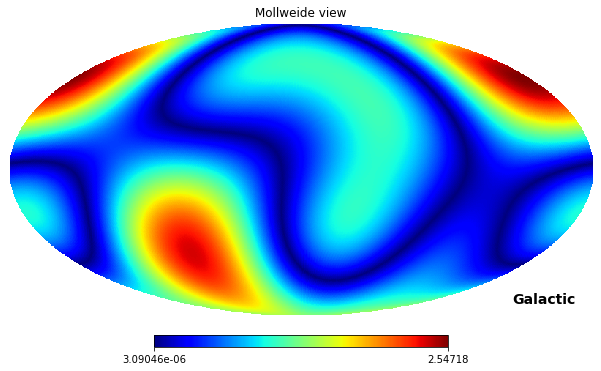

In [7]:
l = [1, 1, 1, 1]
inputMap_galactic = abs(hp.synfast(l, nside=128, new = True))
hp.mollview(map=inputMap_galactic, cmap = "jet", coord = 'G')

In [8]:
events2 = generate_events(inputMap_galactic, galCoord = True)
get_dipole(events2)

Cosmic ray dipole in equatorial coordinates 
 amplitude 57.3% 
 right ascension 116.33° 
 declination 58.36°
